<a href="https://colab.research.google.com/github/karanidnani350/softwareengmgmt/blob/main/Hypothesis_Development_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cellxgene_census
!pip install scanpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.1 MB/s eta 0:00:00
  Created wheel 

### The code will be similar to previous one but with addition of outliers and its research.

In [2]:
import urllib
import scanpy as sc

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = sc.read_h5ad('dataset.h5ad')

genes_of_interest = [
    "SLC26A3", "RASGEF1B", "RP11-701H24.9", "LINGO1",
    "PDE4DIP", "RP11-289H16.1", "AC159540.1", "RP11-219A15.1",
    "LINC01609", "PHYHIP", "RP11-745L13.2"
]


available_genes = adata.var['feature_name'].isin(genes_of_interest)
loaded_genes = adata.var['feature_name'][available_genes].tolist()

# Filter the dataset to include only the specified genes

filtered_adata = adata[:, available_genes].copy()



# Print the successfully loaded genes
print("Successfully loaded genes:", loaded_genes)
print(f"Total genes loaded: {len(loaded_genes)}")

# Print genes that were not found, if any
missing_genes = set(genes_of_interest) - set(loaded_genes)
if missing_genes:
    print("Genes not found in dataset:", missing_genes)

# I didn't know the data point that contains all the genes so I used below code was used to find the data point name for a sample gene.
# for column in adata.var.columns:
#     if 'SLC26A3' in adata.var[column].values:
#         print(f"SLC26A3 found in var column: {column}")



# Visualizing in tabular format for my own understanding
display(filtered_adata.var.head())
display(filtered_adata.obs.head())

Successfully loaded genes: ['SLC26A3', 'LINGO1', 'PDE4DIP', 'LINC01609', 'PHYHIP', 'RASGEF1B']
Total genes loaded: 6
Genes not found in dataset: {'AC159540.1', 'RP11-745L13.2', 'RP11-219A15.1', 'RP11-289H16.1', 'RP11-701H24.9'}


,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000091138,False,SLC26A3,NCBITaxon:9606,gene,646,protein_coding
ENSG00000169783,False,LINGO1,NCBITaxon:9606,gene,579,protein_coding
ENSG00000178104,False,PDE4DIP,NCBITaxon:9606,gene,927,protein_coding
ENSG00000253103,False,LINC01609,NCBITaxon:9606,gene,536,lncRNA
ENSG00000168490,False,PHYHIP,NCBITaxon:9606,gene,847,protein_coding


,nCount_RNA,nFeature_RNA,percent.mt,SORT,Amyloid,Age,RIN,nCount_SCT,nFeature_SCT,nCount_Exon,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
C0001_AAACGGGCAGTACACT-1,927.0,694,1.833873,MAP2,C3,73,5.7,2092.0,787,344.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,5$tsN89o-C
C0001_AAACGGGGTACCGTAT-1,1251.0,886,6.474820,MAP2,C3,73,5.7,2440.0,915,598.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,i+HeMEM)4<
C0001_AAACGGGTCCAGAGGA-1,2972.0,1695,0.201884,MAP2,C3,73,5.7,2949.0,1695,968.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,oi@)SZWo%-
C0001_AAACGGGTCCTTCAAT-1,3619.0,1875,2.459243,MAP2,C3,73,5.7,3269.0,1873,1442.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,V#;BPg@9;|
C0001_AAAGATGGTCAACATC-1,3931.0,2247,2.467566,MAP2,C3,73,5.7,3441.0,2246,1753.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old stage,dk0gL6!4f@


Alzheimer disease cohort statistics:
        ENSG00000091138  ENSG00000169783  ENSG00000178104  ENSG00000253103  \
count     11733.000000     11733.000000     11733.000000     11733.000000   
mean          1.210716         1.899750         1.301823         0.021722   
std           1.032462         1.058674         0.999631         0.179187   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         1.417540         0.000000         0.000000   
50%           1.401869         2.140287         1.592067         0.000000   
75%           2.045627         2.642966         2.106438         0.000000   
max           4.127942         4.539868         3.888691         2.756793   

       ENSG00000168490  ENSG00000138670  
count     11733.000000     11733.000000  
mean          0.498769         2.036067  
std           0.790712         1.037743  
min           0.000000         0.000000  
25%           0.000000         1.624977  
50%           0.

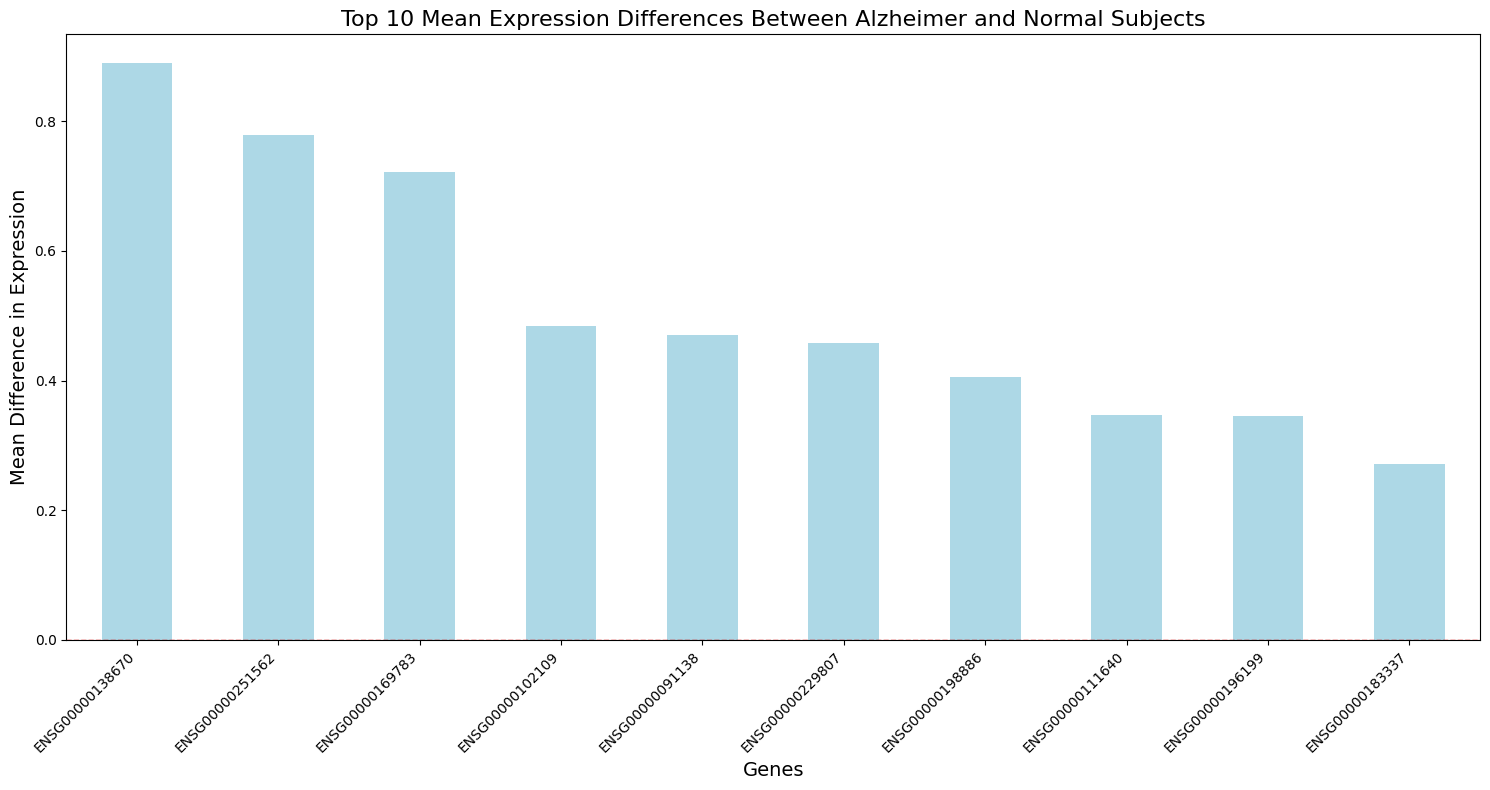

In [3]:
import matplotlib.pyplot as plt
# Categorizing Alzheimer v/s Normal

alzheimer_data = filtered_adata[filtered_adata.obs['disease'] == 'Alzheimer disease']
normal_data = filtered_adata[filtered_adata.obs['disease'] == 'normal disease']


# Checking the statistics
alzheimer_stats = alzheimer_data.to_df().describe()
normal_stats = normal_data.to_df().describe()


print("Alzheimer disease cohort statistics:\n", alzheimer_stats)
print("\nNormal disease cohort statistics:\n", normal_stats)

expr_df = adata.to_df()

# Add disease labels to the DataFrame
expr_df['disease'] = adata.obs['disease'].values

numerical_cols = expr_df.select_dtypes(include='number').columns

# Calculate mean expression per gene for each disease category
alzheimer_means = expr_df[expr_df['disease'] == 'Alzheimer disease'][numerical_cols].mean()
normal_means = expr_df[expr_df['disease'] == 'normal'][numerical_cols].mean()

# Calculate the difference in means
mean_diff = alzheimer_means - normal_means
print("Mean differences:\n", mean_diff)

# Show the top 10 genes with the largest differences in expression
top_n = 10
mean_diff_sorted = mean_diff.sort_values(ascending=False)
mean_diff_sorted = mean_diff_sorted.head(top_n)

print("Top 10 genes with the largest mean expression differences:\n", mean_diff_sorted)

# Plotting the mean differences
plt.figure(figsize=(15, 8))  # Increase the figure size
mean_diff_sorted.plot(kind='bar', color='lightblue')

# Enhance readability
plt.title('Top 10 Mean Expression Differences Between Alzheimer and Normal Subjects', fontsize=16)
plt.ylabel('Mean Difference in Expression', fontsize=14)
plt.xlabel('Genes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels and align them
plt.axhline(0, color='red', linewidth=1, linestyle='--')  # Line at zero for reference
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Show the plot
plt.show()




<ipython-input-5-68cf5a5af1f6>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expression_by_age = expr_df_age.groupby('age_range')[top_genes].mean()


<Figure size 1500x800 with 0 Axes>

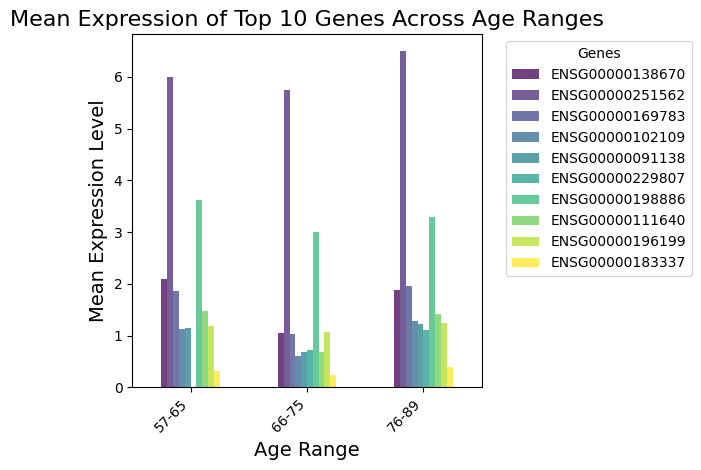

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

top_genes = mean_diff_sorted.index

# Filter data within the age range (57 - 89) for only the top 10 genes
adata.obs['Age'] = pd.to_numeric(adata.obs['Age'], errors='coerce')
age_filtered_data = adata[adata.obs['Age'].between(57, 89)]
expr_df_age = age_filtered_data[:, top_genes].to_df()

# Add age and development stage information
expr_df_age['Age'] = age_filtered_data.obs['Age'].astype(int)  # Ensure Age is numerical
expr_df_age['development_stage'] = age_filtered_data.obs['development_stage'].str.extract(r'(\d+)', expand=False).astype(int)

# Group ages into age ranges (e.g., 57-65, 66-75, 76-89)
age_bins = [57, 65, 75, 89]
age_labels = ['57-65', '66-75', '76-89']
expr_df_age['age_range'] = pd.cut(expr_df_age['Age'], bins=age_bins, labels=age_labels, right=True)

# Calculate mean expression per gene for each age range
mean_expression_by_age = expr_df_age.groupby('age_range')[top_genes].mean()

# Plot the results for each gene across age ranges
plt.figure(figsize=(15, 8))
mean_expression_by_age.plot(kind='bar', colormap='viridis', alpha=0.75)

# Enhance plot readability
plt.title('Mean Expression of Top 10 Genes Across Age Ranges', fontsize=16)
plt.ylabel('Mean Expression Level', fontsize=14)
plt.xlabel('Age Range', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Genes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout for labels

# Show the plot
plt.show()

Outliers for ENSG00000138670: []
Outliers for ENSG00000251562: ['C0007_AAACCTGTCATTTGGG-1', 'C0007_ATTATCCTCGGAATCT-1', 'C0007_GTATTCTGTTCAGGCC-1', 'C0009_TACGGATAGTCATCCA-1', 'C0002_TGACAACAGCCAGAAC-1', 'C0004_ACCCACTTCAGAGCTT-1', 'C0010_GTCAAGTGTCGGCATC-1', 'C0021_AATCCAGAGCTTATCG-1', 'C0021_ACATGGTAGGATGCGT-1', 'C0021_ACGCAGCCAGTGAGTG-1', 'C0021_ACGGGCTCATAAAGGT-1', 'C0021_AGCGTCGGTGTTGAGG-1', 'C0021_AGGGTGAAGGATGGTC-1', 'C0021_AGTGGGACAATACGCT-1', 'C0021_AGTGGGAGTCGCATCG-1', 'C0021_AGTGTCAGTACAAGTA-1', 'C0021_ATCATGGGTTTGGGCC-1', 'C0021_CATCAGACAAGGGTCA-1', 'C0021_CCCATACAGCATGGCA-1', 'C0021_CCGTTCATCACGACTA-1', 'C0021_CGAATGTCATCGTCGG-1', 'C0021_CGATGTAAGATAGGAG-1', 'C0021_CGATGTAGTTCCCGAG-1', 'C0021_CGGACACAGACCGGAT-1', 'C0021_CGGCTAGCAGTCGTGC-1', 'C0021_CGTCAGGAGCAAATCA-1', 'C0021_CGTCTACTCGTCTGCT-1', 'C0021_CGTGTAACAGCTCGAC-1', 'C0021_CTAACTTAGTAGGCCA-1', 'C0021_CTAGTGAAGGATGGAA-1', 'C0021_CTCACACAGAGCTGGT-1', 'C0021_CTCGAGGGTCCGTGAC-1', 'C0021_GATCGATTCGGATGGA-1', 'C0021_GGAAC

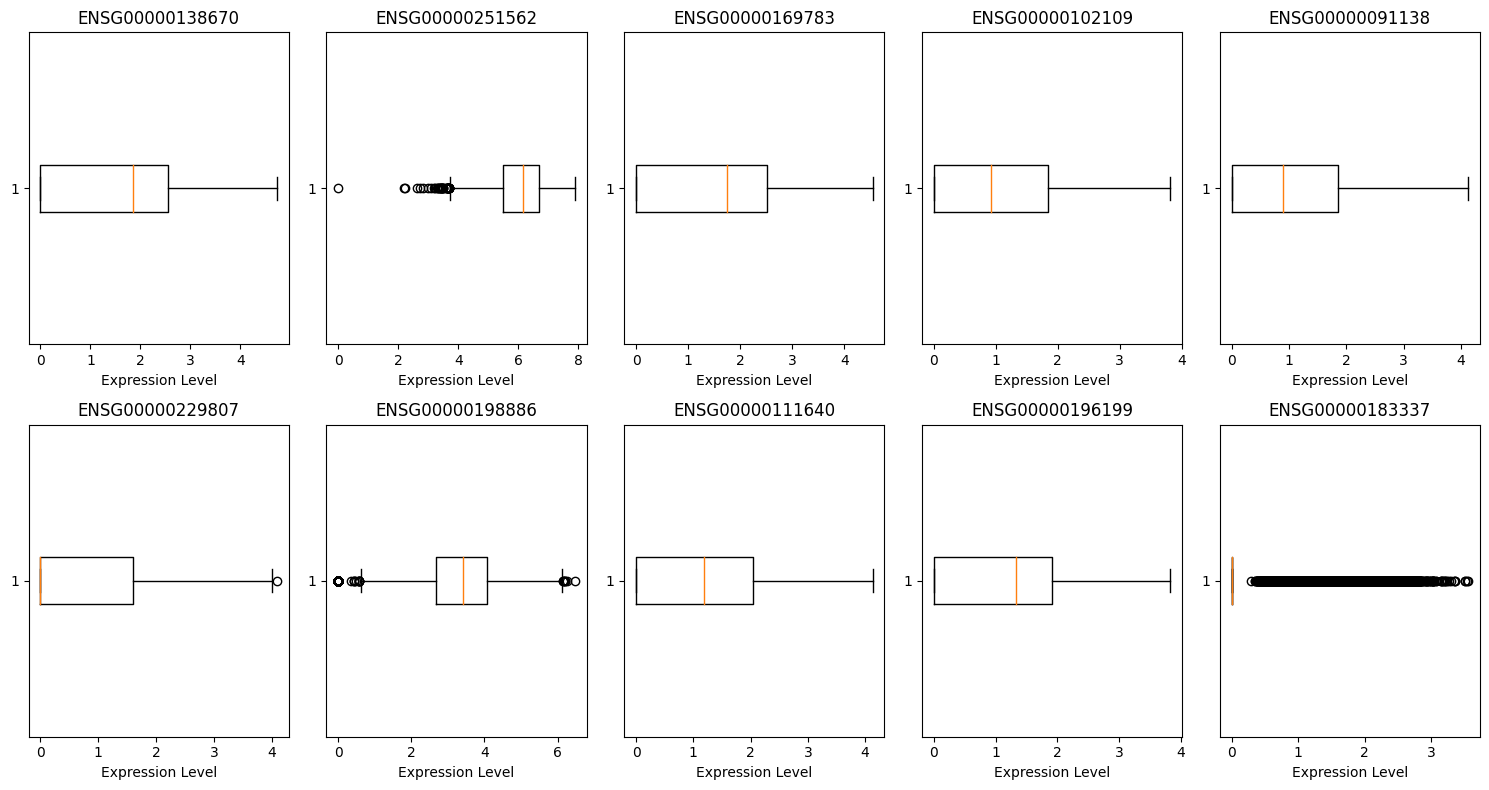

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'top_genes' is a list of your top genes
top_genes = [
    'ENSG00000138670',
    'ENSG00000251562',
    'ENSG00000169783',
    'ENSG00000102109',
    'ENSG00000091138',
    'ENSG00000229807',
    'ENSG00000198886',
    'ENSG00000111640',
    'ENSG00000196199',
    'ENSG00000183337'
]

# Filter adata for top genes
filtered_top_genes_adata = adata[:, top_genes]

# Create a DataFrame for the filtered data
top_genes_df = filtered_top_genes_adata.to_df()

# Identify outliers using the IQR method
def identify_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outliers[column] = outlier_indices
    return outliers

# Get outliers for the top genes
outliers = identify_outliers_iqr(top_genes_df)

# Print outlier information
for gene, indices in outliers.items():
    print(f"Outliers for {gene}: {indices.tolist()}")

# Optional: Visualizing the expression data for outliers
plt.figure(figsize=(15, 8))
for i, gene in enumerate(top_genes):
    plt.subplot(2, 5, i+1)  # Create a subplot for each gene
    plt.boxplot(top_genes_df[gene], vert=False)
    plt.title(gene)
    plt.xlabel('Expression Level')

plt.tight_layout()
plt.show()


<ipython-input-7-851f5c21478c>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outlier_counts = outliers_df.groupby('disease').sum()


Outlier counts by disease:
                    ENSG00000138670  ENSG00000251562  ENSG00000169783  \
disease                                                                
Alzheimer disease                0                7                0   
normal                           0               34                0   

                   ENSG00000102109  ENSG00000091138  ENSG00000229807  \
disease                                                                
Alzheimer disease                0                0                0   
normal                           0                0                1   

                   ENSG00000198886  ENSG00000111640  ENSG00000196199  \
disease                                                                
Alzheimer disease              374                0                0   
normal                         416                0                0   

                   ENSG00000183337     Age  
disease                                     
Alzheimer disea

<ipython-input-7-851f5c21478c>:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_outliers_by_age = outliers_df.groupby(['age_range', 'disease']).mean()


<Figure size 1500x800 with 0 Axes>

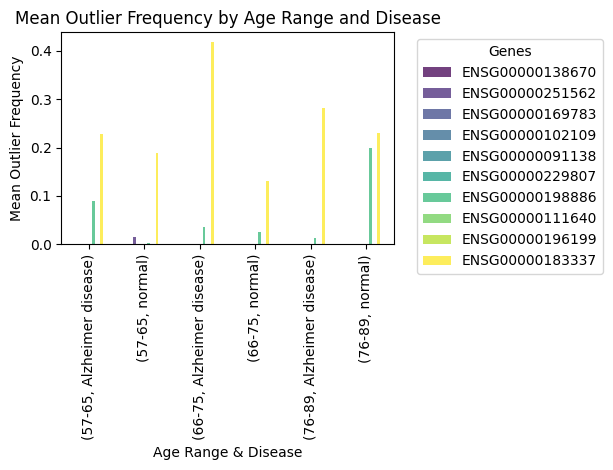

Mann-Whitney U test results for gene expression by disease:
                  U_statistic        p_value
ENSG00000138670   95596568.0   0.000000e+00
ENSG00000251562  109393045.0   0.000000e+00
ENSG00000169783   90074403.0   0.000000e+00
ENSG00000102109   85053777.5  1.151818e-294
ENSG00000091138   83970089.0  1.769105e-261
ENSG00000229807   82860509.5  5.596745e-290
ENSG00000198886   82819077.0  1.191687e-204
ENSG00000111640   79403226.0  9.876583e-135
ENSG00000196199   82617431.5  9.017228e-206
ENSG00000183337   77306101.0  1.008047e-163


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, mannwhitneyu

# Assuming 'top_genes' contains the genes of interest
top_genes = [
    'ENSG00000138670', 'ENSG00000251562', 'ENSG00000169783',
    'ENSG00000102109', 'ENSG00000091138', 'ENSG00000229807',
    'ENSG00000198886', 'ENSG00000111640', 'ENSG00000196199',
    'ENSG00000183337'
]

# Filter adata for top genes
filtered_top_genes_adata = adata[:, top_genes]
top_genes_df = filtered_top_genes_adata.to_df()
top_genes_df['disease'] = adata.obs['disease'].values
top_genes_df['Age'] = adata.obs['Age'].astype(int)

# Define function to identify outliers
def identify_outliers_iqr(df):
    outliers = pd.DataFrame(index=df.index)
    for column in df.columns[:-2]:  # Exclude 'disease' and 'Age' columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Get outliers
outliers_df = identify_outliers_iqr(top_genes_df)
outliers_df['disease'] = top_genes_df['disease']
outliers_df['Age'] = top_genes_df['Age']

# 1. Outlier Analysis by Disease
outlier_counts = outliers_df.groupby('disease').sum()
print("Outlier counts by disease:\n", outlier_counts)

# Chi-square test for independence in outlier frequency between diseases
chi2_results = {}
for gene in top_genes:
    contingency_table = pd.crosstab(outliers_df[gene], outliers_df['disease'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[gene] = {'chi2': chi2, 'p_value': p}
chi2_df = pd.DataFrame(chi2_results).T
print("Chi-square test results for outlier frequency by gene:\n", chi2_df)

# 2. Age and Outlier Correlation
# Define age bins
age_bins = [57, 65, 75, 89]
age_labels = ['57-65', '66-75', '76-89']
outliers_df['age_range'] = pd.cut(outliers_df['Age'], bins=age_bins, labels=age_labels, right=True)

# Calculate mean outlier frequency by age range and disease
mean_outliers_by_age = outliers_df.groupby(['age_range', 'disease']).mean()
print("Mean outlier frequency by age range and disease:\n", mean_outliers_by_age)

# Visualize outlier frequency by age range for each gene
plt.figure(figsize=(15, 8))
mean_outliers_by_age[top_genes].plot(kind='bar', colormap='viridis', alpha=0.75)
plt.title('Mean Outlier Frequency by Age Range and Disease')
plt.xlabel('Age Range & Disease')
plt.ylabel('Mean Outlier Frequency')
plt.legend(title='Genes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Expression Comparison using Mann-Whitney U Test
mannwhitney_results = {}
for gene in top_genes:
    alzheimer_expr = top_genes_df[top_genes_df['disease'] == 'Alzheimer disease'][gene]
    normal_expr = top_genes_df[top_genes_df['disease'] == 'normal'][gene]
    stat, p = mannwhitneyu(alzheimer_expr, normal_expr, alternative='two-sided')
    mannwhitney_results[gene] = {'U_statistic': stat, 'p_value': p}

mannwhitney_df = pd.DataFrame(mannwhitney_results).T
print("Mann-Whitney U test results for gene expression by disease:\n", mannwhitney_df)

# Optional: Save results to CSV
chi2_df.to_csv("chi_square_test_results.csv")
mannwhitney_df.to_csv("mann_whitney_test_results.csv")


Spearman correlation results for age and gene expression:
                  alz_corr    alz_p_value  normal_corr  normal_p_value
ENSG00000138670 -0.178884   5.840757e-85    -0.121478    6.062179e-39
ENSG00000251562  0.077924   2.849496e-17     0.035446    1.470304e-04
ENSG00000169783 -0.011109   2.288864e-01    -0.100835    2.684381e-27
ENSG00000102109  0.166800   5.839665e-74    -0.358374    0.000000e+00
ENSG00000091138 -0.026623   3.926395e-03    -0.033678    3.103291e-04
ENSG00000229807  0.455577   0.000000e+00     0.005641    5.459220e-01
ENSG00000198886 -0.000690   9.404262e-01    -0.388144    0.000000e+00
ENSG00000111640  0.197100  4.337133e-103    -0.516396    0.000000e+00
ENSG00000196199 -0.060387   5.895606e-11     0.053049    1.320638e-08
ENSG00000183337  0.060412   5.789140e-11    -0.022103    1.795156e-02


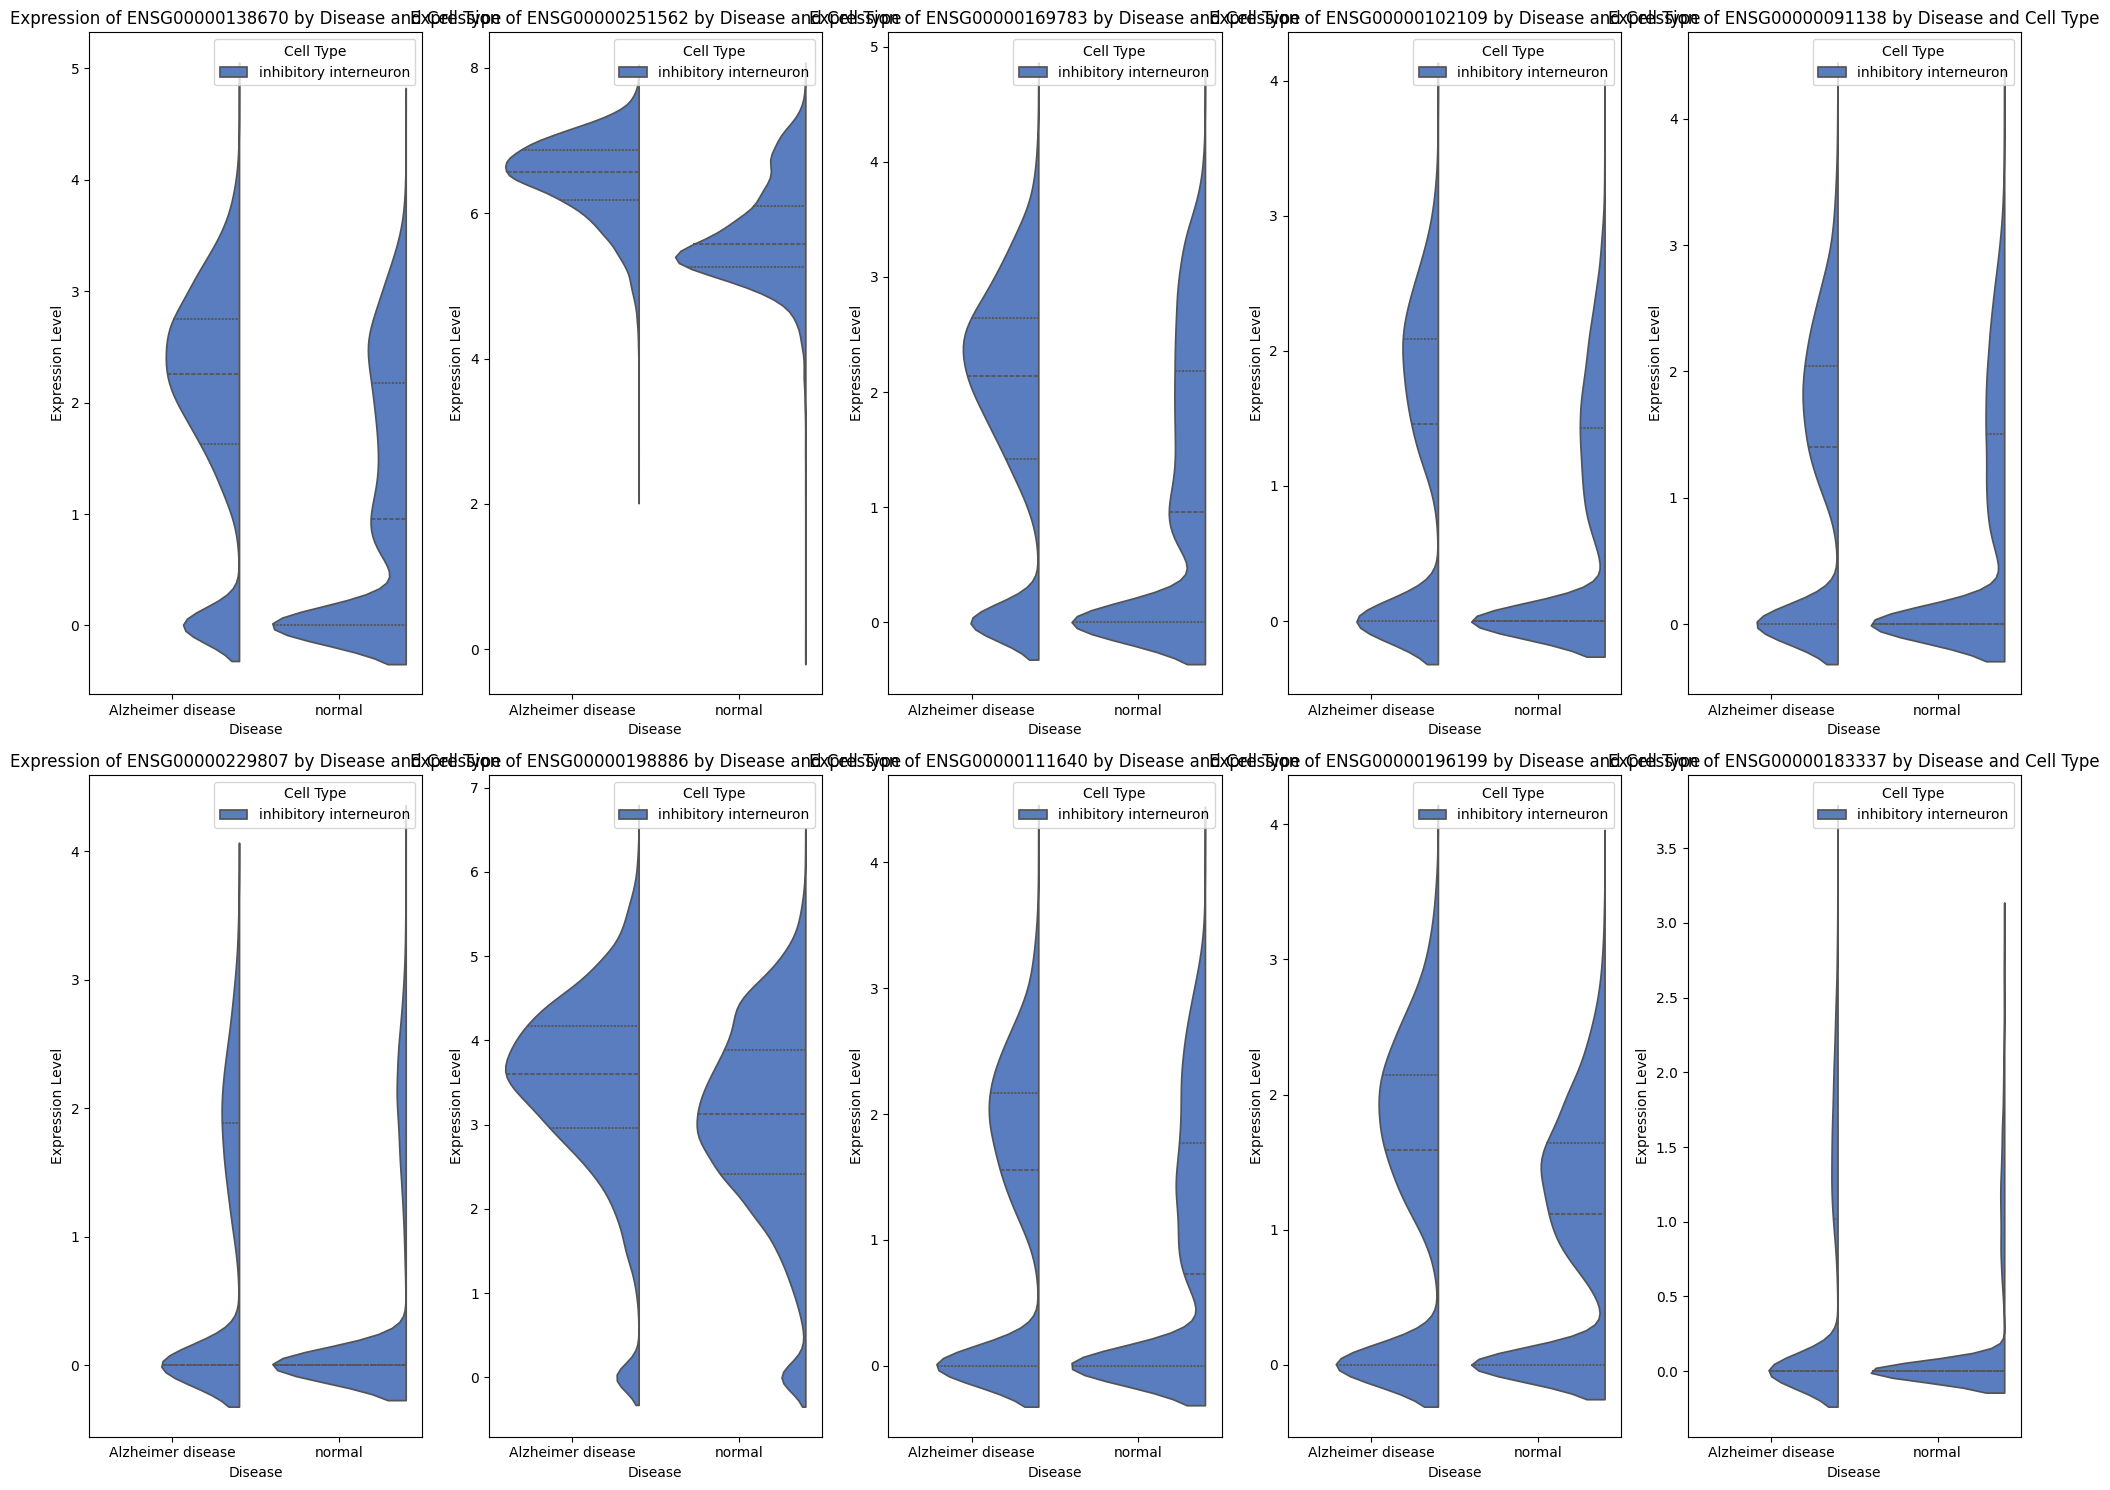

<ipython-input-9-13a92e640d52>:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outlier_freq_by_cell = binary_outliers_df.groupby(['cell_type', 'disease']).sum()
<ipython-input-9-13a92e640d52>:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_cells_by_group = binary_outliers_df.groupby(['cell_type', 'disease']).size()


Outlier frequency by cell type and disease:
                                           ENSG00000138670  ENSG00000251562  \
cell_type              disease                                               
inhibitory interneuron Alzheimer disease                0                7   
                       normal                           0               34   

                                          ENSG00000169783  ENSG00000102109  \
cell_type              disease                                               
inhibitory interneuron Alzheimer disease                0                0   
                       normal                           0                0   

                                          ENSG00000091138  ENSG00000229807  \
cell_type              disease                                               
inhibitory interneuron Alzheimer disease                0                0   
                       normal                           0                1   

                

In [9]:
import seaborn as sns
from scipy.stats import spearmanr

# 1. Correlation of Gene Expression with Age (Spearman Correlation)
age_correlation_results = {}
for gene in top_genes:
    alzheimer_expr_age = top_genes_df[top_genes_df['disease'] == 'Alzheimer disease'][['Age', gene]]
    normal_expr_age = top_genes_df[top_genes_df['disease'] == 'normal'][['Age', gene]]

    # Spearman correlation for Alzheimer samples
    spearman_corr_alz, p_alz = spearmanr(alzheimer_expr_age['Age'], alzheimer_expr_age[gene])

    # Spearman correlation for normal samples
    spearman_corr_norm, p_norm = spearmanr(normal_expr_age['Age'], normal_expr_age[gene])

    age_correlation_results[gene] = {
        'alz_corr': spearman_corr_alz, 'alz_p_value': p_alz,
        'normal_corr': spearman_corr_norm, 'normal_p_value': p_norm
    }

age_corr_df = pd.DataFrame(age_correlation_results).T
print("Spearman correlation results for age and gene expression:\n", age_corr_df)

# 2. Differential Expression Visualization (Violin Plots)
# Adding cell type to the DataFrame
top_genes_df['cell_type'] = adata.obs['cell_type'].values

# Plotting violin plots for each gene
plt.figure(figsize=(20, 15))
for i, gene in enumerate(top_genes):
    plt.subplot(2, 5, i+1)
    sns.violinplot(data=top_genes_df, x='disease', y=gene, hue='cell_type', split=True, inner="quart", palette="muted")
    plt.title(f"Expression of {gene} by Disease and Cell Type")
    plt.xlabel('Disease')
    plt.ylabel('Expression Level')
    plt.legend(loc='upper right', title='Cell Type')

plt.tight_layout()
plt.show()

# 3. Outlier Frequency by Cell Type
outliers_df['cell_type'] = adata.obs['cell_type'].values


# Creating a binary DataFrame indicating outliers (1 if outlier, 0 if not)
binary_outliers_df = pd.DataFrame(0, index=top_genes_df.index, columns=top_genes)

for gene, indices in outliers.items():
    binary_outliers_df.loc[indices, gene] = 1

# Add cell type and disease information to this DataFrame
binary_outliers_df['cell_type'] = adata.obs['cell_type'].values
binary_outliers_df['disease'] = adata.obs['disease'].values

# Calculate outlier frequency by cell type and disease
outlier_freq_by_cell = binary_outliers_df.groupby(['cell_type', 'disease']).sum()
print("Outlier frequency by cell type and disease:\n", outlier_freq_by_cell)

# Optional: You can also normalize the frequency by dividing by the total number of cells in each group
total_cells_by_group = binary_outliers_df.groupby(['cell_type', 'disease']).size()
outlier_freq_normalized = outlier_freq_by_cell.div(total_cells_by_group, axis=0)
print("Normalized outlier frequency by cell type and disease:\n", outlier_freq_normalized)


# Chi-Square test for outlier presence across cell types within each disease group
chi2_results_cell_type = {}
for gene in top_genes:
    for disease in outliers_df['disease'].unique():
        subset = outliers_df[outliers_df['disease'] == disease]
        contingency_table = pd.crosstab(subset[gene], subset['cell_type'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_results_cell_type[(gene, disease)] = {'chi2': chi2, 'p_value': p}

chi2_cell_type_df = pd.DataFrame(chi2_results_cell_type).T
print("Chi-square test results for outlier frequency by cell type:\n", chi2_cell_type_df)

# Optional: Save extended results to CSV
age_corr_df.to_csv("age_correlation_results.csv")
chi2_cell_type_df.to_csv("chi_square_cell_type_test_results.csv")
